In [6]:
import numpy as np 
import pandas as pd

data= pd.read_csv("Draft10.txt", sep= "\t",skiprows=1)


In [7]:
data.head()

,0.000000000000000e+000,0.000000e+000,3.399622e-003,3.399622e-003.1
0,1.000000e-12,0.0,0.003412,0.003412
1,1.342786e-12,0.0,0.003417,0.003417
2,2.028358e-12,0.0,0.003425,0.003425
3,3.399501e-12,0.0,0.003441,0.003441
4,6.141788e-12,0.0,0.003471,0.003471


In [8]:
def calculate_averages(data, timestep):
    current_time = data[0, 0]
    sum_values = 0
    count = 0
    averages = []

    for time, value in data:
        if time - current_time <= timestep:
            sum_values += value
            count += 1
        else:
            if count != 0:
                averages.append(sum_values / count)
            else:
                averages.append(0)  # In case there's no data within the timestep
            # Reset for the next timestep
            current_time = time
            sum_values = value
            count = 1
    
    # Add average for the last timestep
    if count != 0:
        averages.append(sum_values / count)
    else:
        averages.append(0)

    return np.array(averages)

In [9]:
data=data.iloc[:,[0,3]]
dat=np.array(data)

In [10]:
averages = calculate_averages(data.values, timestep=10000*((10)**(-9))) 

In [11]:
averages.shape

(260,)

In [12]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'INL_in_lsb')

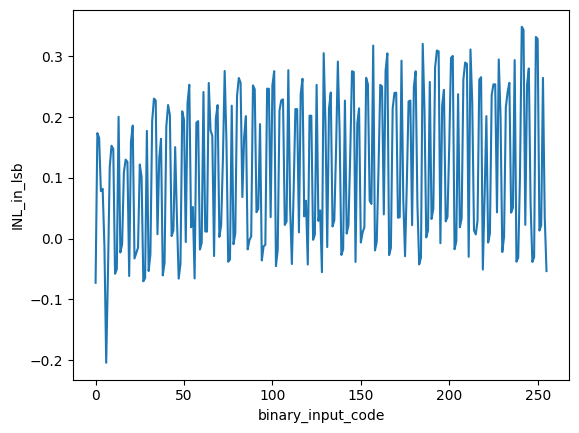

In [28]:
plt.plot(averages[0:256]*(256/2.0)-0.5)
plt.xlabel("binary_input_code")
plt.ylabel("INL_in_lsb")

In [14]:
dnl= averages - np.roll(averages, 1)

In [26]:
print(dnl.shape)
dnl[0]

(260,)


-0.0045637030472071224

Text(0, 0.5, 'DNL_in_lsb')

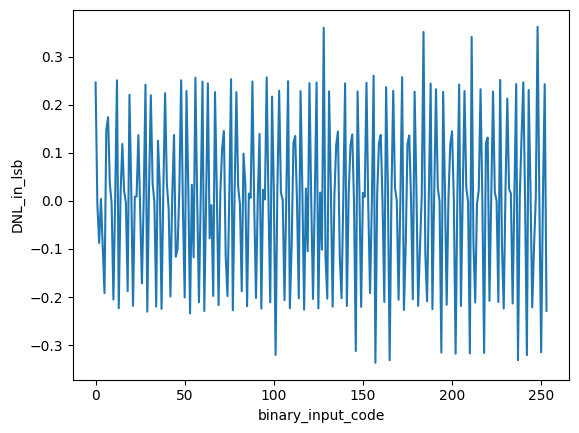

In [27]:
plt.plot(dnl[1:255]*128)
plt.xlabel("binary_input_code")
plt.ylabel("DNL_in_lsb")

In [18]:
arr=[1,2,3,4,5]
new_arr= arr - np.roll(arr,1)
print(new_arr)

[-4  1  1  1  1]
